# Importing Necessary Libraries

- Numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- Matplotlib: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper Function and utils


In [ ]:
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = line.replace('\n', '').split(',')
            line = list(map(float, line))
            data.append(line)
    return np.array(data)


def plotter(means_all, covars_all, spaces=np.linspace(-10, 30, 100)):
    fig = plt.figure(figsize=(16, 16))
    rgb = ['red', 'green', 'blue']
    for i, (mean, cov) in enumerate(zip(means_all, covars_all)):
        ax = fig.add_subplot(2, 2, i + 1, projection='3d')
        x, y = np.meshgrid(spaces, spaces)
        xy = np.column_stack([x.ravel(), y.ravel()])
        for cls in mean.keys():
            pdf_values = np.zeros(xy.shape[0])
            for j in range(xy.shape[0]):
                diff = xy[j] - mean[cls]

                pdf_values[j] = np.exp(-0.5 * np.dot(np.dot(diff.T,
                                                            np.linalg.inv(cov[cls])), diff))

            pdf_values = pdf_values.reshape(x.shape)
            ax.plot_wireframe(x, y, pdf_values, cmap='viridis',
                              color=rgb[int(cls)-1], alpha=0.8)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('PDF')
        ax.set_title(f'Distribution {i + 1}')

    plt.tight_layout()
    plt.show()

def plot_decision_boundary(X,y, clfs):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        feature_pair = X
        Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)

        # Plot the decision boundary
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot the data points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

        ax.set_xlabel(f'Feature {i+1}')
        ax.set_ylabel(f'Feature {i+2}')
        ax.set_title(f'Decision Boundary')

    # Adjust spacing for better layout
    plt.tight_layout()
    plt.show()

# Classifier 1 Defined by **Bayes classifier with the same Covariance matrix for all classes**


In [ ]:
class Classifier1:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.cov(X_c, rowvar=False)
            self.priors[c] = len(X_c)/len(train_x)

        for c in self.classes[1:]:
            self.covars[c] = self.covars[self.classes[0]]

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# Classifier 2 Defined by **Bayes classifier with different Covariance matrix across classes**


In [ ]:
class Classifier2:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.cov(X_c, rowvar=False)
            self.priors[c] = len(X_c)/len(train_x)

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# Classifier 3 Defined by Naive Bayes classifier with the Covariance matrix S = $\sigma^2I$ same for all classes


In [ ]:
class Classifier3:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.var(X_c, axis=0)*np.eye(self.num_features)
            self.priors[c] = len(X_c)/len(train_x)

        for c in self.classes[1:]:
            self.covars[c] = self.covars[self.classes[0]]

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# Classifier 4 Defined by **Naive Bayes classifier with S of the above form, but being different across classes**


In [ ]:
class Classifier4:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.var(X_c, axis=0)*np.eye(self.num_features)
            self.priors[c] = len(X_c)/len(train_x)

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# Getting the whole under an Analysis Function


In [ ]:
def analysis(data=[read_data('Linear/train.txt'), read_data('Linear/dev.txt'),
                   read_data('NonLinear/train.txt'), read_data('NonLinear/dev.txt')]):
    classifiers = [Classifier1, Classifier2, Classifier3, Classifier4]
    train_xl, train_yl = data[0][:, :-1], data[0][:, -1]
    test_xl, test_yl = data[1][:, :-1], data[1][:, -1]\

    means_all = []
    covars_all = []
    clfs = []

    for classifier in classifiers:
        lin_clf = classifier(train_xl, train_yl)
        print(
            f'Training accuracy: {round(np.mean(lin_clf.predict(train_xl) == train_yl)*100,2)}%, Testing accuracy: {round(np.mean(lin_clf.predict(test_xl) == test_yl)*100,2)}% ')
        means_all.append(lin_clf.means)
        covars_all.append(lin_clf.covars)
        clfs.append(lin_clf)
    return means_all, covars_all, clfs

In [ ]:
lin_means_all, lin_covars_all, lin_clfs = analysis(
    [read_data('Linear/train.txt'), read_data('Linear/dev.txt')])

Training accuracy: 100.0%, Testing accuracy: 100.0% 
Training accuracy: 100.0%, Testing accuracy: 100.0% 
Training accuracy: 100.0%, Testing accuracy: 100.0% 
Training accuracy: 100.0%, Testing accuracy: 100.0% 


In [ ]:
nlin_means_all, nlin_covars_all, nlin_clfs = analysis(
    [read_data('NonLinear/train.txt'), read_data('NonLinear/dev.txt')])

Training accuracy: 71.14%, Testing accuracy: 69.67% 
Training accuracy: 98.38%, Testing accuracy: 98.67% 
Training accuracy: 71.24%, Testing accuracy: 69.67% 
Training accuracy: 98.1%, Testing accuracy: 98.67% 


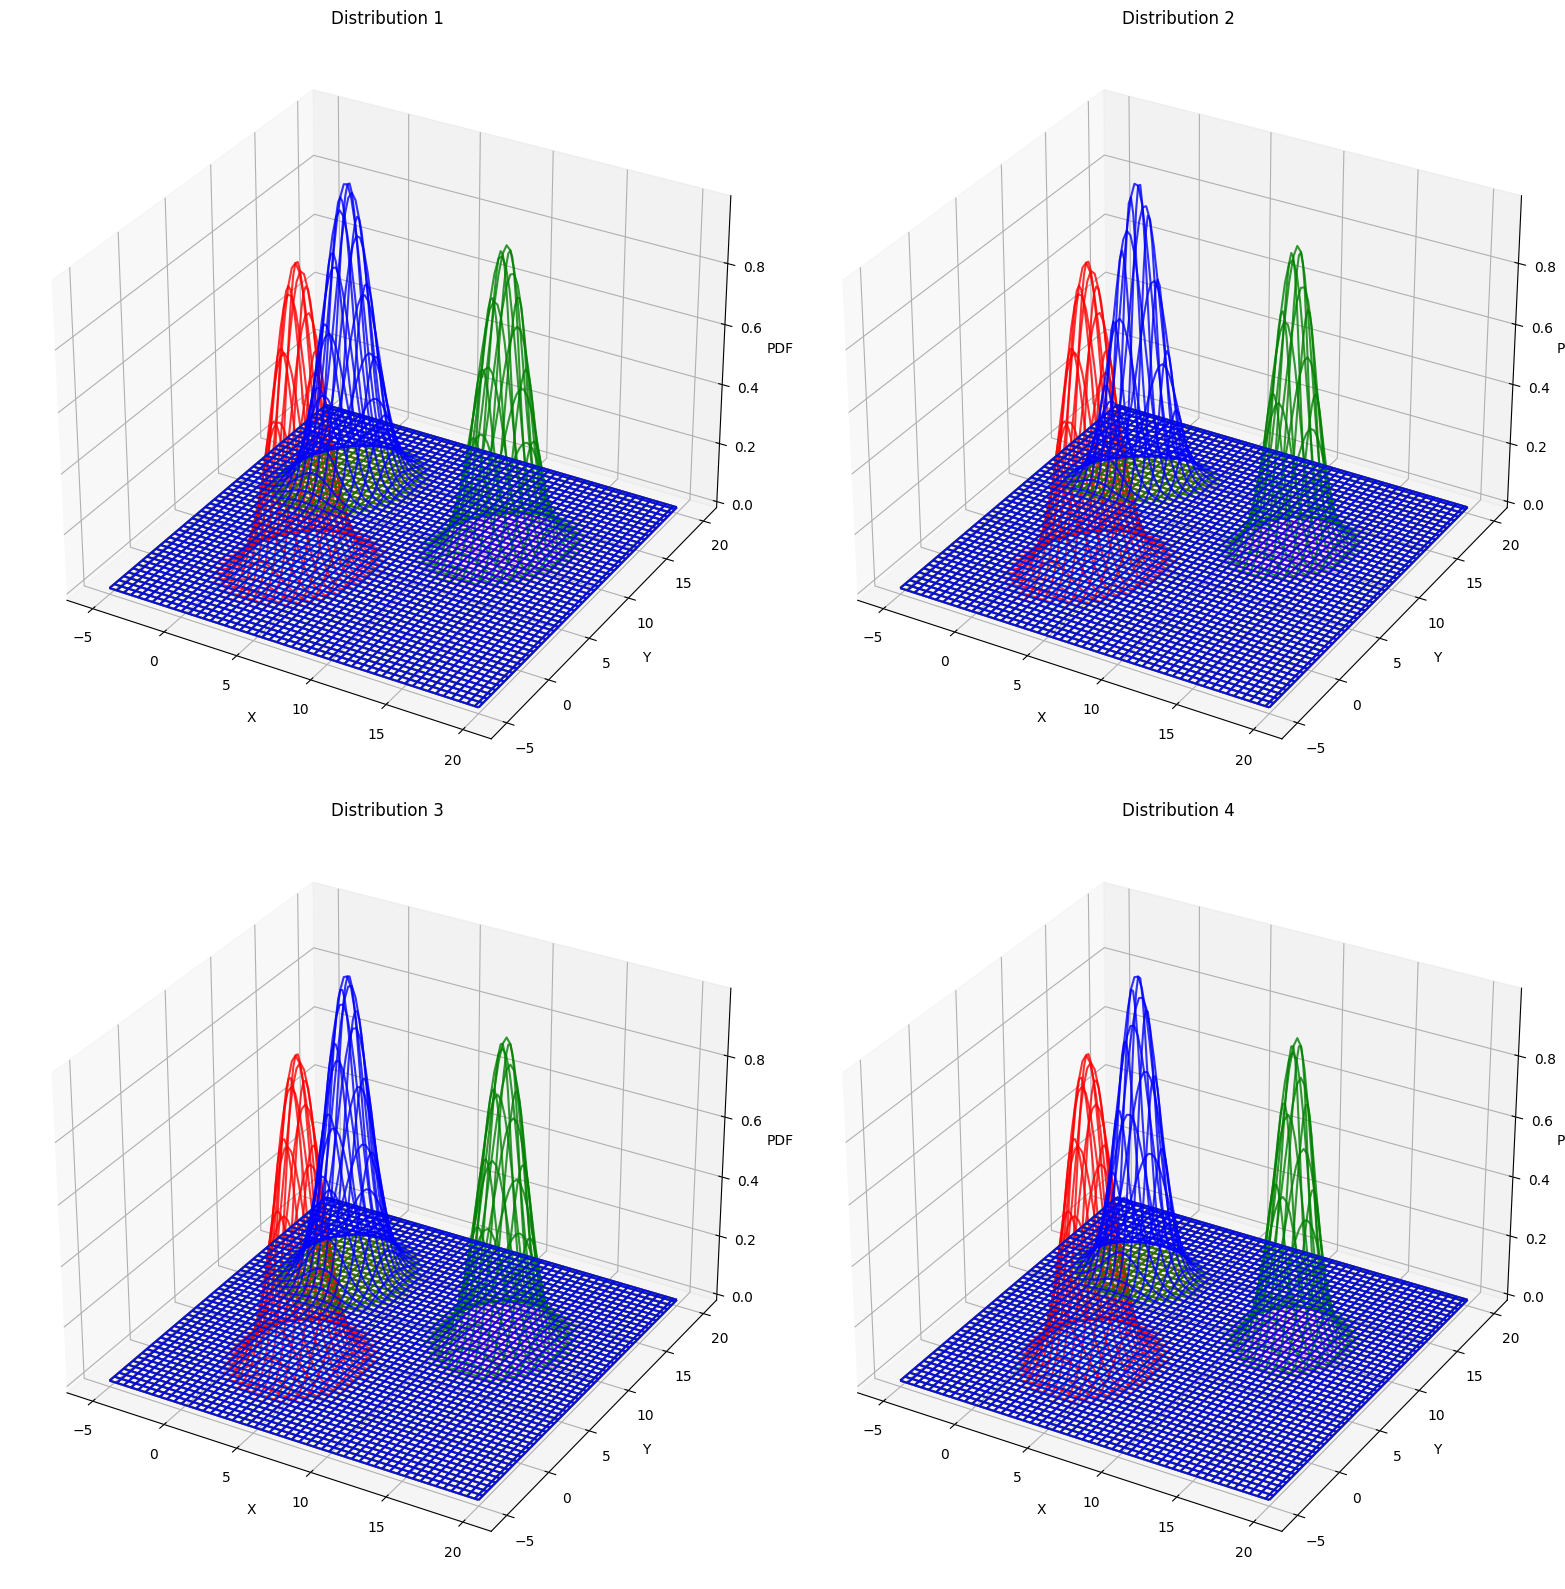

In [ ]:
plotter(lin_means_all, lin_covars_all, spaces=np.linspace(-5, 20, 100))

In [ ]:
plotter(nlin_means_all, nlin_covars_all, spaces=np.linspace(-15, 60, 100))

Output hidden; open in https://colab.research.google.com to view.

# Plot decision Boundary


In [ ]:
lin = read_data('Linear/train.txt')
lin_X, lin_y = lin[:, :-1], lin[:, -1]
nlin = read_data('NonLinear/train.txt')
nlin_X, nlin_y = nlin[:, :-1], nlin[:, -1]

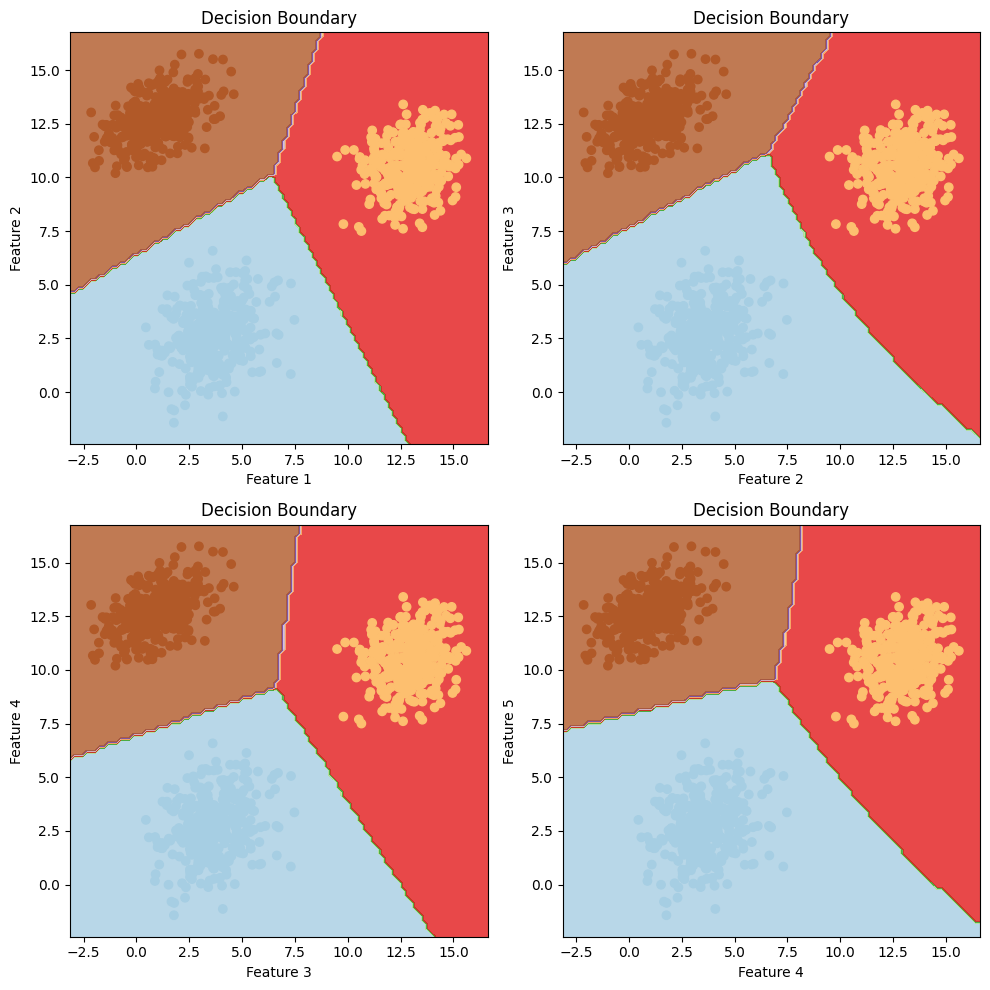

In [ ]:
plot_decision_boundary(lin_X,lin_y, lin_clfs)

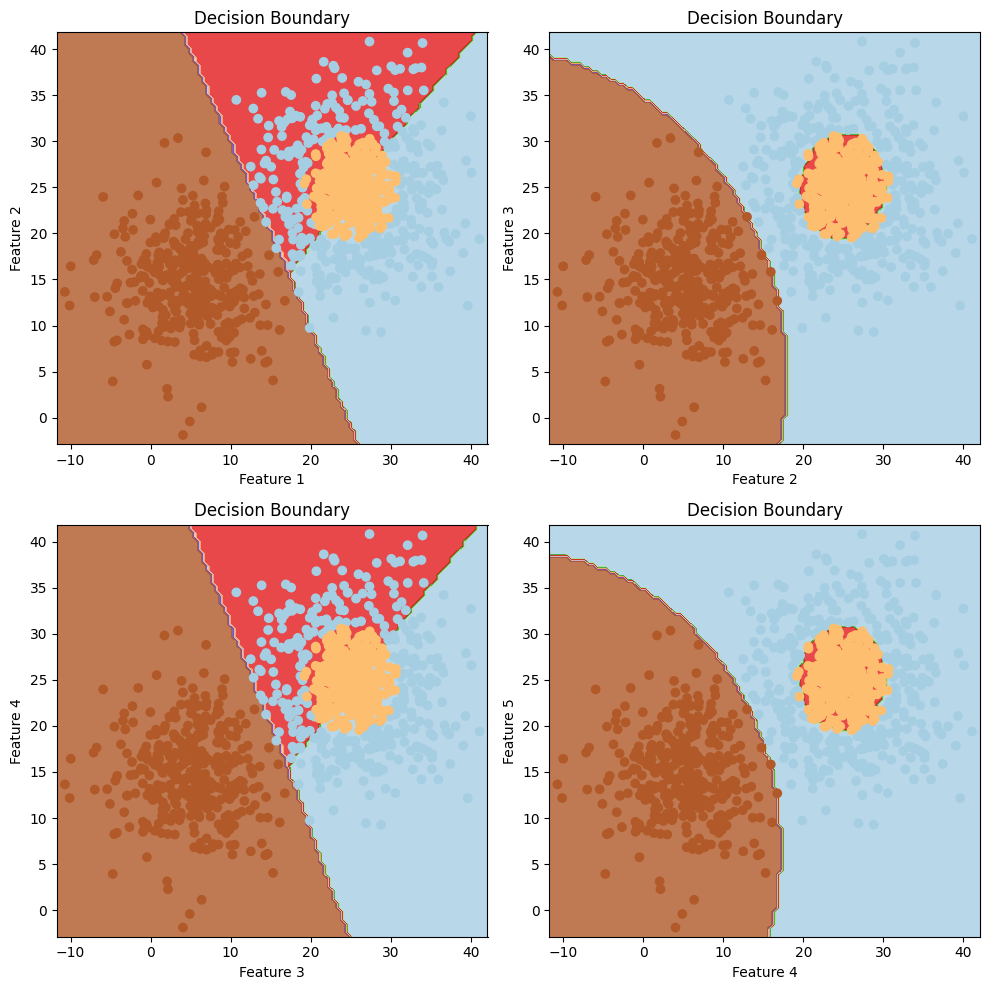

In [ ]:
plot_decision_boundary(nlin_X,nlin_y, nlin_clfs)